This project aims to predict the movement of assets based on quantitative analysis and machine learning. This is an ongoing project. Data is collected from tdameritrade api, https://developer.tdameritrade.com.  Quantitative analysis techniques will be used to make predictions and then compared with machine learning techniques. 

In [1]:
import os
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from datetime import datetime
import requests
from api_key import api_key # api_key was saved in an api_key.py file

In [2]:
# creating api url request

symbol = input().upper()
url = 'https://api.tdameritrade.com/v1/marketdata/{}/pricehistory'.format(symbol)


aapl


In [3]:
# refer to tdameritrade documentation for parameters.

payload = {'apikey': api_key,
          'periodType': 'year',
          'period': '20',
          'frequencyType': 'daily',
          'frequency': '1'}


# retrieving historically price function and returns a response string object

def historicalPrice(symbols):
    if isinstance(symbols, dict):
        price = {}
        for symbol in symbols.keys():
            url = 'https://api.tdameritrade.com/v1/marketdata/{}/pricehistory'.format(symbol)
            # extracting the response object into json format
            price[symbol] = requests.get(url, payload).json()
    else:
        url = 'https://api.tdameritrade.com/v1/marketdata/{}/pricehistory'.format(symbols)
        price = requests.get(url, payload).json()
    return price

In [74]:
# converting miliseconds to datetime format. Also add additional day to get current date.

def daily_datetime(data):
    df = data
    df['date'] = df['datetime'].map(lambda x: datetime.fromtimestamp((x + 86400000) / 1000))
    df['date'] = df['date'].map(lambda x: datetime.strptime(str(x).split(' ')[0], '%Y-%m-%d'))
    return df

In [65]:
# Spider Sectors

sectors = {'XLC': 'Communication Services', 'XLY': 'Consumer Discretionary', 'XLP': 'Consumer Staples',
          'XLE': 'Energy', 'XLF': 'Financials', 'XLV': 'Health Care', 'XLI': 'Industrials', 'XLB': 'Materials',
          'XLRE': 'Real Estate', 'XLK': 'Technology', 'XLU': 'Utilities', 'MSOS': 'US Cannabis'}

In [66]:
# retrieving historical price of each sector.

sectorsPrice = historicalPrice(sectors)
os.system('say "Retrieving is done"')

0

In [75]:
# loading json dictionary into a dictionary of dataframes.

hp_df = {}
for sector in sectors.keys():
    hp_df[sector] = pd.json_normalize(sectorsPrice[sector], 'candles')
    daily_datetime(hp_df[sector])

<BarContainer object of 1021 artists>

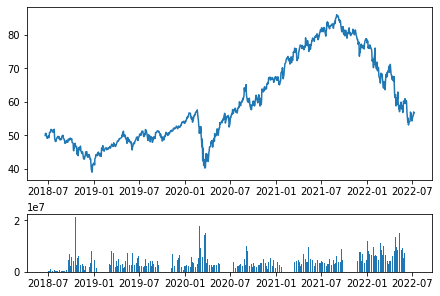

In [76]:
# plottinh using matplotlib 

import matplotlib.gridspec as gridspec

fig = plt.figure(constrained_layout=True)
gs = gridspec.GridSpec(4,4, fig)
ax_price = fig.add_subplot(gs[:3,:])
ax_vol = fig.add_subplot(gs[3,:])

x = hp_df['XLC']['date']
y_price = hp_df['XLC']['close']
y_vol = hp_df['XLC']['volume']

ax_price.plot(x,y_price)
ax_vol.bar(x,y_vol)

In [81]:
# percent change

def percentChange(data):
    if isinstance(data, dict):
        for sector in data.keys():
            data[sector]['percent change'] = np.zeros(len(data[sector]))
            for i in range(1,len(data[sector])):
                data[sector]['percent change'][i] = round((data[sector]['close'][i] -  data[sector]['close'][i-1]) /  data[sector]['close'][i-1] * 100,2)
    return data

In [84]:
hp_df = percentChange(hp_df)

/var/folders/8y/vcb_0h497jz93hhf27ygq36c0000gn/T/ipykernel_75093/3018228625.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data[sector]['percent change'][i] = round((data[sector]['close'][i] -  data[sector]['close'][i-1]) /  data[sector]['close'][i-1] * 100,2)


In [85]:
hp_df['XLC'].tail()

,open,high,low,close,volume,datetime,date,Percent change,percent change
1016,54.08,54.890,53.705,54.82,4400436,1656651600000,2022-07-01,1.01,1.01
1017,54.13,56.120,53.610,56.09,4237414,1656997200000,2022-07-05,2.32,2.32
1018,56.09,56.545,55.492,56.10,4234945,1657083600000,2022-07-06,0.02,0.02
1019,56.27,57.210,56.120,56.98,3297224,1657170000000,2022-07-07,1.57,1.57
1020,56.45,57.130,56.170,56.71,2566941,1657256400000,2022-07-08,-0.47,-0.47
